# 🦀 Bach's Crab Canon: A Palindromic Exploration

This notebook explores J.S. Bach's **Canon Cancrizans** (Crab Canon) from *The Musical Offering* (BWV 1079) using the Cancrizans toolkit.

## What is a Crab Canon?

A **crab canon** is a musical composition where one voice is the exact **retrograde** (time-reversal) of another. When played simultaneously, they create a perfect **palindrome** in time.

- **Voice 1**: Plays the melody forward → 
- **Voice 2**: Plays the same melody backward ←
- **Result**: The piece sounds identical whether played forward or backward!

In [1]:
# Setup
import sys
from pathlib import Path

# Add parent directory to path
sys.path.insert(0, str(Path.cwd().parent))

# Imports
import matplotlib.pyplot as plt
from music21 import converter, stream, note
from cancrizans import (
    retrograde,
    invert,
    is_time_palindrome,
    pairwise_symmetry_map,
    assemble_crab_from_theme,
)
from cancrizans.io import to_midi, to_musicxml
from cancrizans.viz import piano_roll, symmetry

# Configure matplotlib
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['figure.dpi'] = 100

print("✓ Cancrizans toolkit loaded successfully")

✓ Cancrizans toolkit loaded successfully


## 1. Load Bach's Crab Canon

We'll load the authentic Bach Crab Canon from the downloaded MIDI file.

In [2]:
# Load the real Bach Crab Canon
score = converter.parse('../data/bach_crab_canon_original.mid')

print(f"Number of parts: {len(score.parts)}")
print(f"Total duration: {score.highestTime:.2f} quarter notes")
print(f"Duration in seconds (at 60 BPM): {score.highestTime:.2f}s")

parts = list(score.parts)
for i, part in enumerate(parts, 1):
    notes_count = len([n for n in part.flatten().notesAndRests if not n.isRest])
    print(f"\nVoice {i}: {notes_count} notes")

Number of parts: 2
Total duration: 144.00 quarter notes
Duration in seconds (at 60 BPM): 144.00s

Voice 1: 184 notes

Voice 2: 184 notes


## 2. Verify the Palindrome Property

Let's verify that this is indeed a true crab canon using our `is_time_palindrome()` function.

In [3]:
# Verify palindrome property
is_palindrome = is_time_palindrome(score)

print(f"is_time_palindrome: {is_palindrome}")

if is_palindrome:
    print("✓ This is a TRUE crab canon!")
    print("  Voice 2 is the exact retrograde of Voice 1")
else:
    print("✗ This is NOT a perfect crab canon")

is_time_palindrome: True
✓ This is a TRUE crab canon!
  Voice 2 is the exact retrograde of Voice 1


## 3. Analyze Symmetric Pairs

In a crab canon, every note has a **symmetric partner**. Let's examine these pairs.

In [4]:
# Get symmetric pairs from Voice 1
voice1 = parts[0]
pairs = pairwise_symmetry_map(voice1)

print(f"Total symmetric pairs: {len(pairs)}")
print(f"Total notes in voice 1: {len(list(voice1.flatten().notesAndRests))}")
print(f"\nFirst 10 symmetric pairs (index i maps to index j):")
for i, (idx_fwd, idx_bwd) in enumerate(pairs[:10]):
    print(f"  Pair {i+1}: note[{idx_fwd}] ↔ note[{idx_bwd}]")

Total symmetric pairs: 93
Total notes in voice 1: 186

First 10 symmetric pairs (index i maps to index j):
  Pair 1: note[0] ↔ note[185]
  Pair 2: note[1] ↔ note[184]
  Pair 3: note[2] ↔ note[183]
  Pair 4: note[3] ↔ note[182]
  Pair 5: note[4] ↔ note[181]
  Pair 6: note[5] ↔ note[180]
  Pair 7: note[6] ↔ note[179]
  Pair 8: note[7] ↔ note[178]
  Pair 9: note[8] ↔ note[177]
  Pair 10: note[9] ↔ note[176]


## 4. Visualize: Piano Roll

A piano roll shows notes as horizontal bars on a pitch-time grid.

✓ Piano roll saved to: ../examples/bach_piano_roll.png


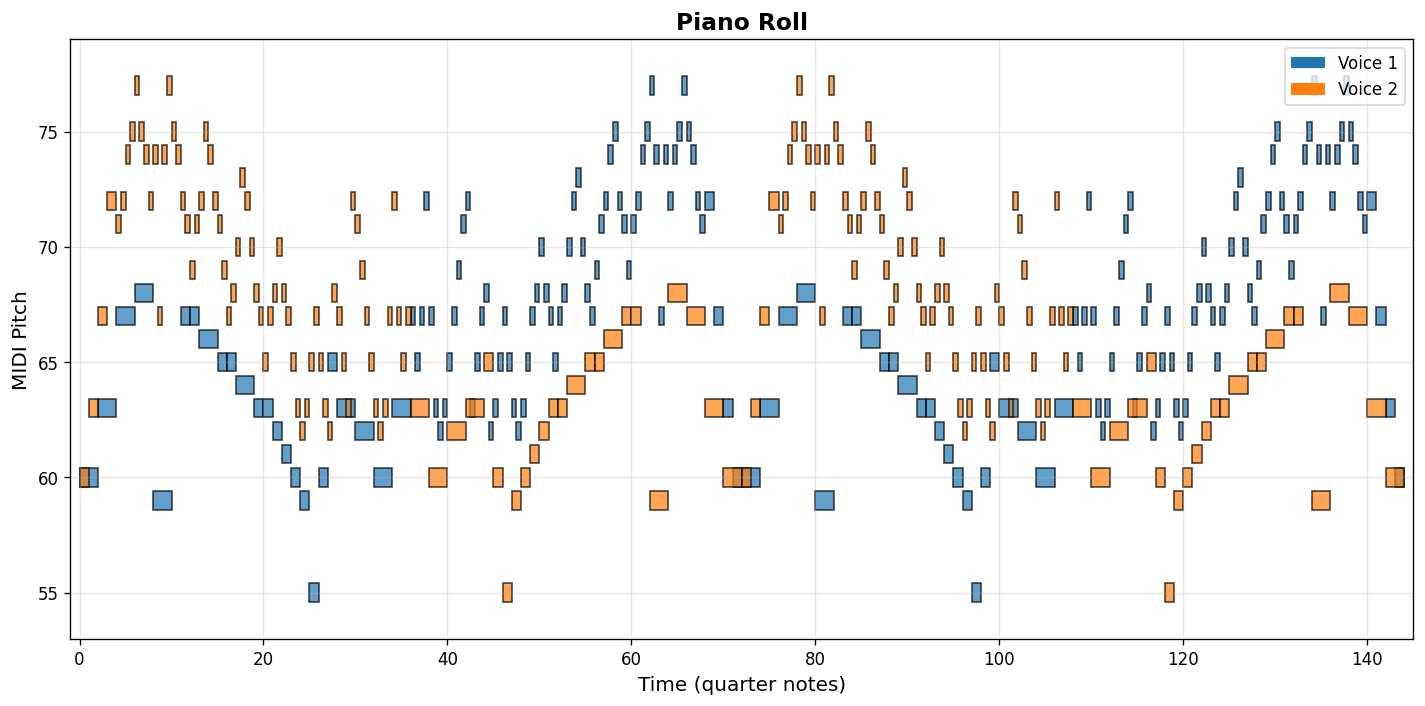

In [5]:
# Generate piano roll
piano_roll_path = piano_roll(score, '../examples/bach_piano_roll.png', dpi=120)
print(f"✓ Piano roll saved to: {piano_roll_path}")

# Display it
from IPython.display import Image
Image(filename=str(piano_roll_path))

## 5. Visualize: Symmetry Plot

The symmetry plot shows the **temporal midpoint** and connects palindromic note pairs.

✓ Symmetry plot saved to: ../examples/bach_symmetry.png


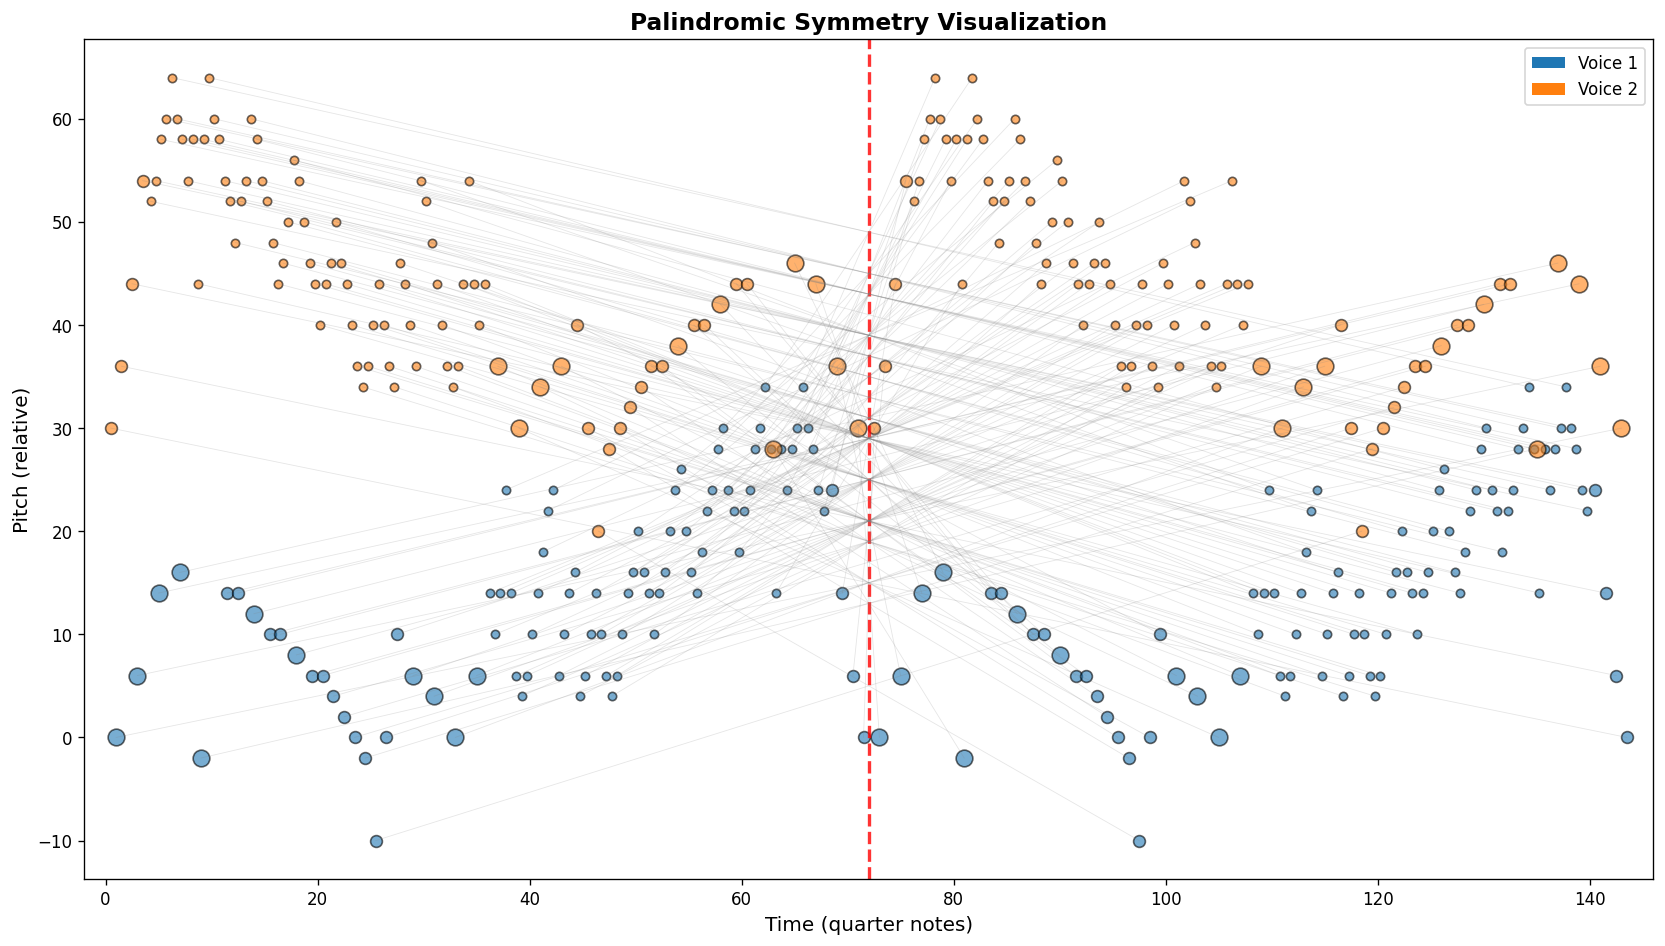

In [6]:
# Generate symmetry plot
symmetry_path = symmetry(score, '../examples/bach_symmetry.png', dpi=120)
print(f"✓ Symmetry plot saved to: {symmetry_path}")

# Display it
Image(filename=str(symmetry_path))

## 6. Export Audio

Let's export the crab canon as MIDI and MusicXML files.

In [7]:
# Export MIDI
midi_path = to_midi(score, '../examples/bach_crab_canon.mid')
print(f"✓ MIDI exported to: {midi_path}")

# Export MusicXML
xml_path = to_musicxml(score, '../examples/bach_crab_canon.musicxml')
print(f"✓ MusicXML exported to: {xml_path}")

print("\n📁 You can now play these files in your favorite music software!")

✓ MIDI exported to: ../examples/bach_crab_canon.mid


✓ MusicXML exported to: ../examples/bach_crab_canon.musicxml

📁 You can now play these files in your favorite music software!


## 7. Explore: Retrograde Transformation

Let's manually create a retrograde to understand how it works.

In [8]:
# Create a simple theme
theme = stream.Stream()
theme.append(note.Note('C4', quarterLength=1.0))
theme.append(note.Note('D4', quarterLength=1.0))
theme.append(note.Note('E4', quarterLength=1.0))
theme.append(note.Note('F4', quarterLength=1.0))
theme.append(note.Note('G4', quarterLength=2.0))

# Create retrograde
theme_retro = retrograde(theme)

# Show both
print("Original theme:")
for n in theme.flatten().notes:
    print(f"  {n.nameWithOctave} (duration: {n.quarterLength})")

print("\nRetrograde:")
for n in theme_retro.flatten().notes:
    print(f"  {n.nameWithOctave} (duration: {n.quarterLength})")

Original theme:
  C4 (duration: 1.0)
  D4 (duration: 1.0)
  E4 (duration: 1.0)
  F4 (duration: 1.0)
  G4 (duration: 2.0)

Retrograde:
  G4 (duration: 2.0)
  F4 (duration: 1.0)
  E4 (duration: 1.0)
  D4 (duration: 1.0)
  C4 (duration: 1.0)


## 8. Create Your Own Crab Canon

Let's assemble a simple crab canon from a custom theme.

In [9]:
# Create a melodic theme
my_theme = stream.Stream()
melody = [
    ('C4', 0.5), ('E4', 0.5), ('G4', 0.5), ('C5', 0.5),
    ('B4', 0.5), ('G4', 0.5), ('E4', 0.5), ('C4', 1.0),
]

for pitch, duration in melody:
    my_theme.append(note.Note(pitch, quarterLength=duration))

# Assemble crab canon
my_crab = assemble_crab_from_theme(my_theme, offset_quarters=0.0)

# Verify it's a palindrome
print(f"Is my canon a palindrome? {is_time_palindrome(my_crab)}")

# Export it
to_midi(my_crab, '../examples/my_crab_canon.mid')
print("\n✓ Your crab canon has been created!")
print("  File: examples/my_crab_canon.mid")

Is my canon a palindrome? True

✓ Your crab canon has been created!
  File: examples/my_crab_canon.mid


## 9. Visualize Your Creation

✓ Visualizations created!


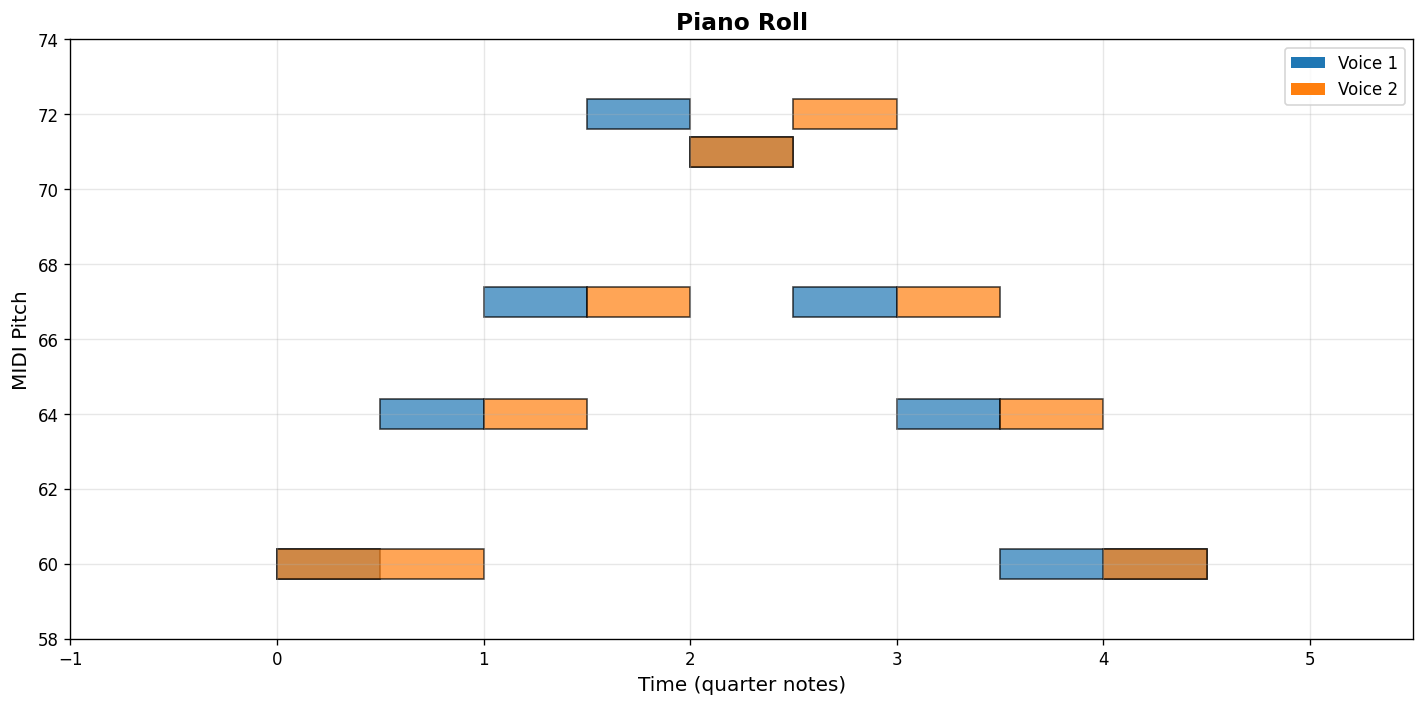

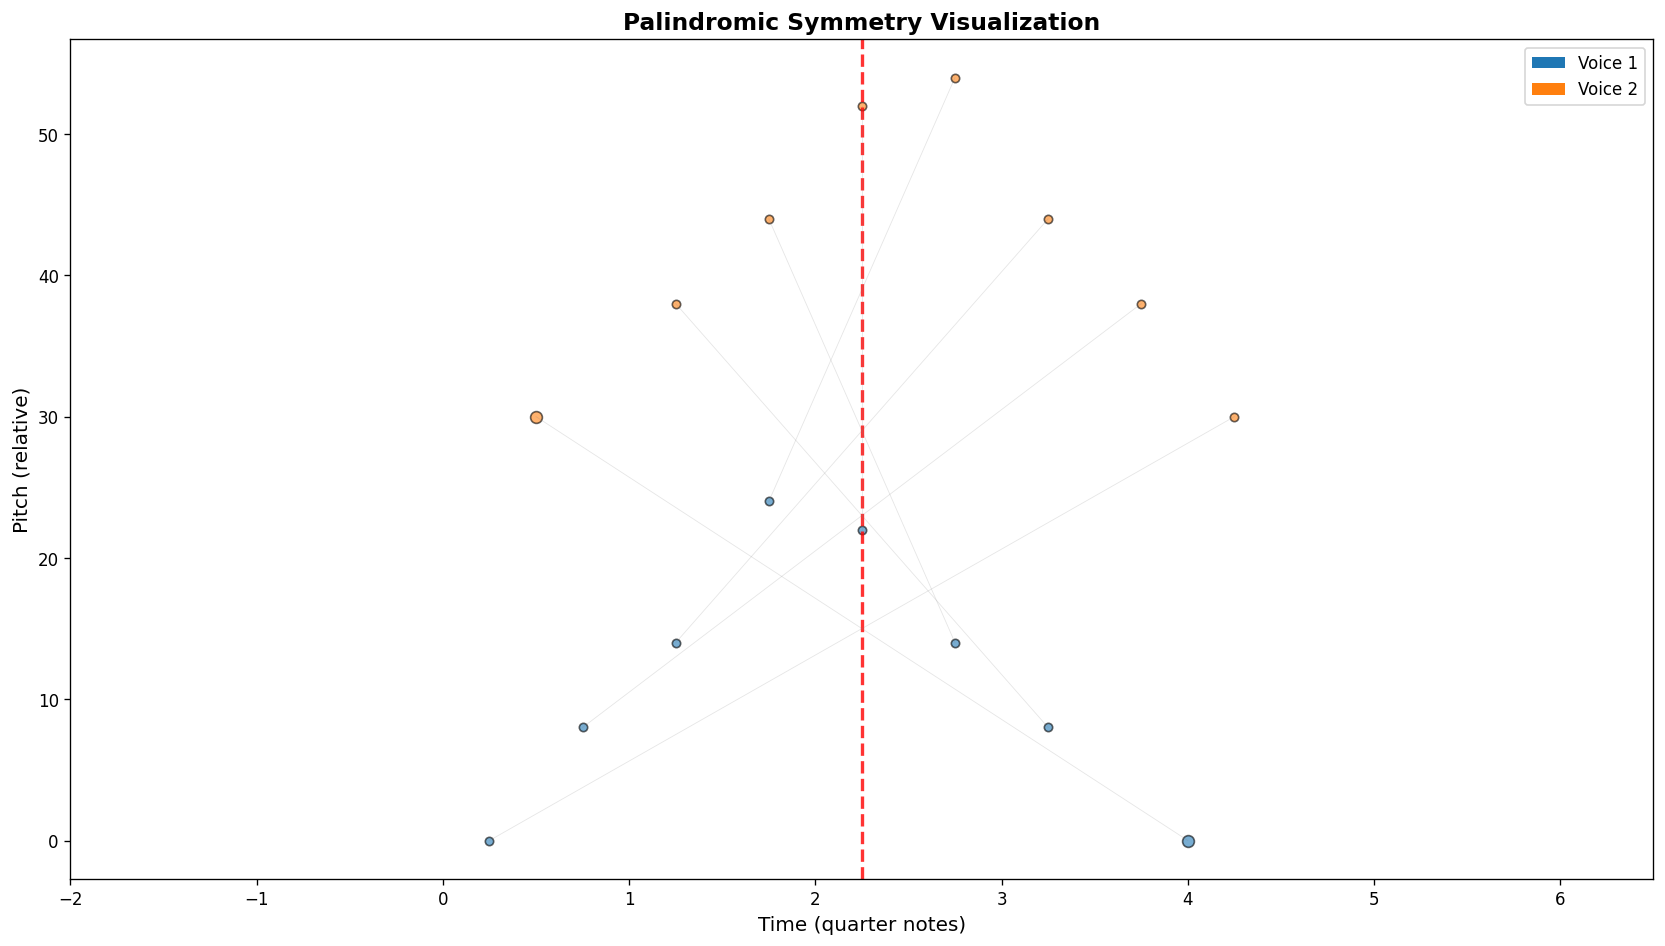

In [10]:
# Visualize your crab canon
piano_roll(my_crab, '../examples/my_crab_piano_roll.png', dpi=120)
symmetry(my_crab, '../examples/my_crab_symmetry.png', dpi=120)

print("✓ Visualizations created!")

# Display
from IPython.display import Image, display
display(Image(filename='../examples/my_crab_piano_roll.png'))
display(Image(filename='../examples/my_crab_symmetry.png'))

## 10. Explore Inversion

Inversion reflects pitches around an axis. Let's see how it differs from retrograde.

In [11]:
# Create a simple ascending scale
scale = stream.Stream()
for pitch in ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5']:
    scale.append(note.Note(pitch, quarterLength=0.5))

# Invert around G4
scale_inverted = invert(scale, axis_pitch='G4')

print("Original scale (C major ascending):")
print([n.nameWithOctave for n in scale.flatten().notes])

print("\nInverted scale (around G4):")
print([n.nameWithOctave for n in scale_inverted.flatten().notes])

# Retrograde-inversion (both transformations)
retro_inv = invert(retrograde(scale), axis_pitch='G4')
print("\nRetrograde-inversion:")
print([n.nameWithOctave for n in retro_inv.flatten().notes])

Original scale (C major ascending):
['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5']

Inverted scale (around G4):
['D5', 'C5', 'B-4', 'A4', 'G4', 'F4', 'E-4', 'D4']

Retrograde-inversion:
['D4', 'E-4', 'F4', 'G4', 'A4', 'B-4', 'C5', 'D5']


## Summary

In this notebook, we:

1. ✅ Loaded Bach's authentic Crab Canon
2. ✅ Verified its palindrome property
3. ✅ Analyzed symmetric note pairs
4. ✅ Created piano roll and symmetry visualizations
5. ✅ Exported MIDI and MusicXML files
6. ✅ Explored retrograde transformation
7. ✅ Created our own crab canon
8. ✅ Explored inversion

### Next Steps

- Try the web interface for interactive playback
- Experiment with different themes
- Explore retrograde-inversion canons
- Study other Bach canons from *The Musical Offering*

---

**"Going backwards, like a crab" 🦀**
